####  Telcom Customer Churn Analysis 📉
#### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

####  About this file
Telcom Customer Churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

#### Story and Background
This project analyzes customer behavior and churn patterns from a telecom company using a real-world dataset of 7,043 customers and 21 attributes. The goal is to help the business identify churn drivers, customer segmentation, and opportunities to improve retention and customer value.

📌 Using Python’s data analytics and visualization libraries, we extract actionable insights to enable smarter business decisions, personalized offers, and strategic interventions.

#### Business Questions

##### what is the ratio between males and females in our company?
##### what is the ratio between Senior Citizens and others in our company?
##### what is the ratio between who has partners and not in our company?
##### what is the ratio between who has dependents and not in our company?
##### what is the ratio between who has MultipleLines and not in our company?
##### Depending on the correlation matrix, which variables have a strong relationship with each other?
##### From the previous question,What is the relationship between the Internet Services and the churn rate?
##### how many Internet Services we provide in our company? - list names and ratio please -
##### what is our Contract types we provide? - names and ratio please-
##### how many customers uses StreamingTV ?
##### what is the ratio between users who streaming movies to StreamingTV subscribers?
##### Is there a strong relationship between the monthly recharge rate and the dependents?
##### who is the the most important customer in the company according to Monthly and Total charges?
##### how many payment methods we provide? and what is the ratio between each others?
##### what is our churn rate?
##### what is the average monthly charge?
##### From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate?
-------
#### We want to give offers according to the monthly charge categories, can you explain that? Using Visulization

In [95]:
#  Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle

In [96]:
df= pd.read_csv("Telco-Customer-Churn_dataset.csv")

In [97]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
# Rename the 'tenure' column to 'Duration' for clarity
df.rename(columns= {'tenure': 'Duration'}, inplace=True )

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Duration          7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [100]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Duration            0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [101]:
# Check if there are any values in the dataset is unusual or invalid
df.describe(include= 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,Duration,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [102]:
 # Count NaN values in 'TotalCharges'
df['TotalCharges'].isna().sum()

0

In [103]:
df['TotalCharges'].isin([' ','']).sum()

11

In [104]:
# Convert 'TotalCharges' to numeric, set invalid entries as NaN
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors= 'coerce')

# Check again for NaN values after conversion
df['TotalCharges'].isna().sum(), df['TotalCharges'].dtype

(11, dtype('float64'))

In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Duration,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Q1 - What is the ratio between males and females in our company?

In [106]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

gender
Male      3555
Female    3488
Name: count, dtype: int64

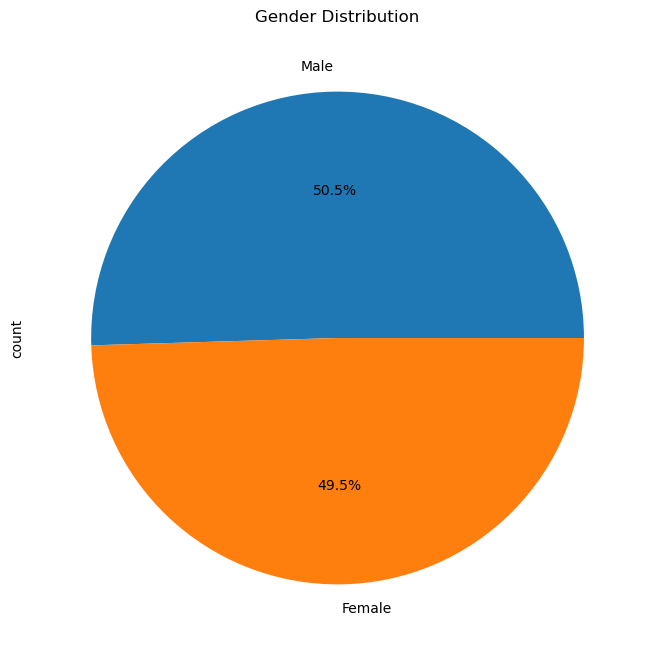

In [107]:
gender_counts= df['gender'].value_counts()

#plotting the distribution of gender

plt.figure(figsize=(10, 8))
gender_counts.plot(kind= 'pie', color=['green', 'red'], autopct= '%1.1f%%')
plt.title('Gender Distribution')

gender_counts

#### Q2 - What is the ratio between Senior Citizens and others in our company?

SeniorCitizen
Not Senior Citizen    5901
Senior Citizen        1142
Name: count, dtype: int64

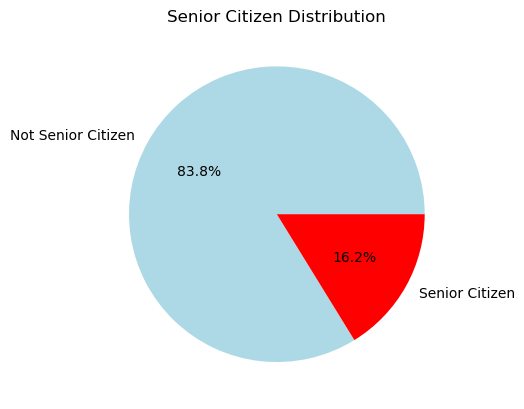

In [108]:
citizen_condition= df['SeniorCitizen'].value_counts()

#replace 0 with 'Not Senior Citizen' and 1 with 'Senior Citizen' in citizen_condition 
citizen_condition.index= citizen_condition.index.map({0: 'Not Senior Citizen', 1: 'Senior Citizen'})

plt.pie(citizen_condition, labels= list(citizen_condition.index), autopct= '%1.1f%%', colors= ['lightblue','red'])

plt.title('Senior Citizen Distribution')


citizen_condition


#### Q3 What is the ratio between who has partners and not in our company?

Partner
No Partener     3641
Has Partener    3402
Name: count, dtype: int64

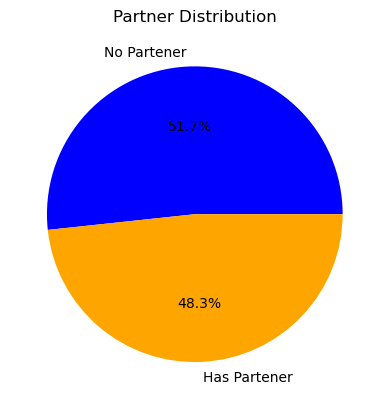

In [109]:
partener_condition= df['Partner'].value_counts()

#replace Yes with 'Has Partener' and No with 'No Partener' in partener_condition 

partener_condition.index= partener_condition.index.map({'Yes': 'Has Partener', 'No': 'No Partener'})

plt.pie(partener_condition, labels= list(partener_condition.index), autopct= '%1.1f%%', colors= ['blue','orange'])

plt.title('Partner Distribution')


partener_condition


#### Q4 - What is the ratio between who has dependents and not in our company?

Dependents
No Dependent     4933
Has Dependent    2110
Name: count, dtype: int64

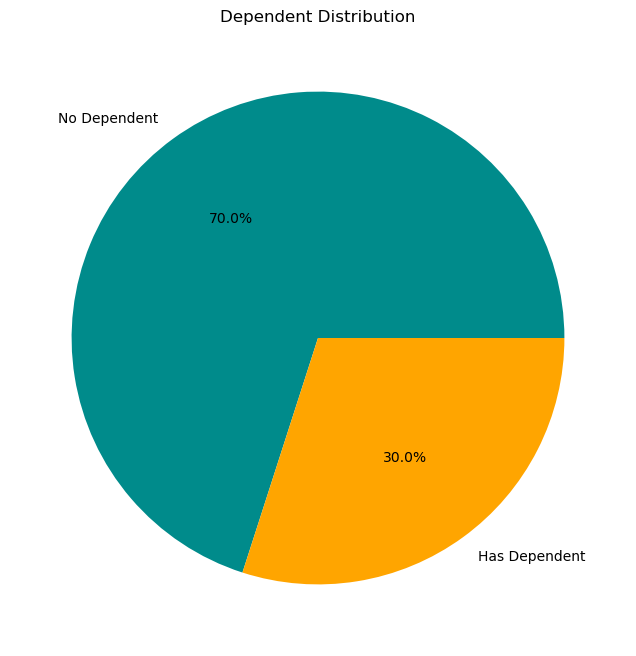

In [110]:
dependent_condition= df['Dependents'].value_counts()

#replace Yes with 'Has Dependent ' and No with 'No Dependent' in dependent_condition
dependent_condition.index= dependent_condition.index.map({'Yes': 'Has Dependent', 'No': 'No Dependent'})

# Plotting the distribution of dependents
plt.figure(figsize=(10,8))
plt.pie(dependent_condition, labels= list(dependent_condition.index), autopct= '%1.1f%%', colors= ['Darkcyan', 'orange'])

plt.title('Dependent Distribution')

dependent_condition

#### Q5 - What is the ratio between who has MultipleLines and not in our company?

Text(0.5, 1.0, 'Multiple Lines Distribution')

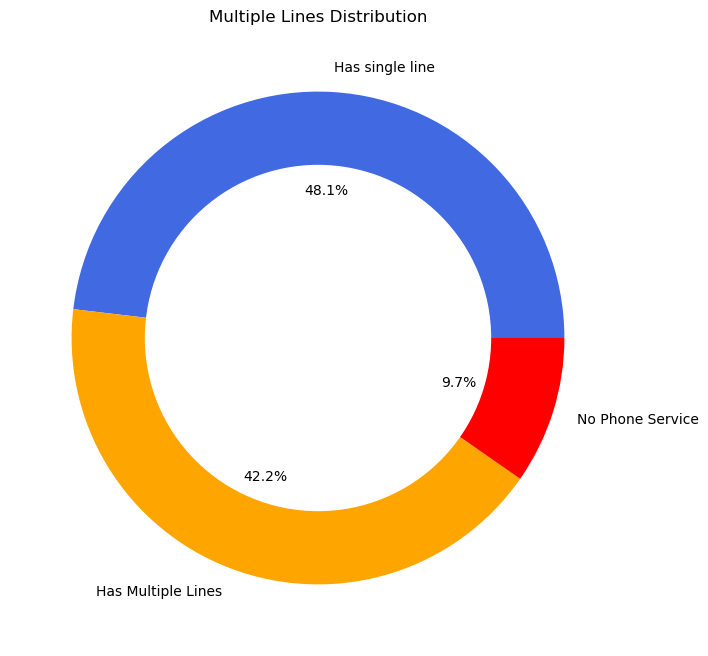

In [111]:
lines_counts = df['MultipleLines'].value_counts()

lines_counts.index = lines_counts.index.map({'Yes': 'Has Multiple Lines', 'No': 'Has single line', 'No phone service': 'No Phone Service'})

# Plotting the distribution of multiple lines   
plt.figure(figsize=(10, 8))

plt.pie(lines_counts, labels=list(lines_counts.index), autopct='%1.1f%%', colors=['royalblue', 'orange', 'red'])

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Multiple Lines Distribution')


#### Q6 - Depending on the correlation matrix, which variables have a strong relationship with each other?

##### Correlation is a measure of the linear relationship between two numerical columns. It is computed only for numerical columns only¶
##### In our dataset the only numerical columns are:
##### -SeniorCitizen
##### -Duration
##### -MonthlyCharges
##### -TotalCharges

Text(0.5, 1.0, 'Correlation Matrix')

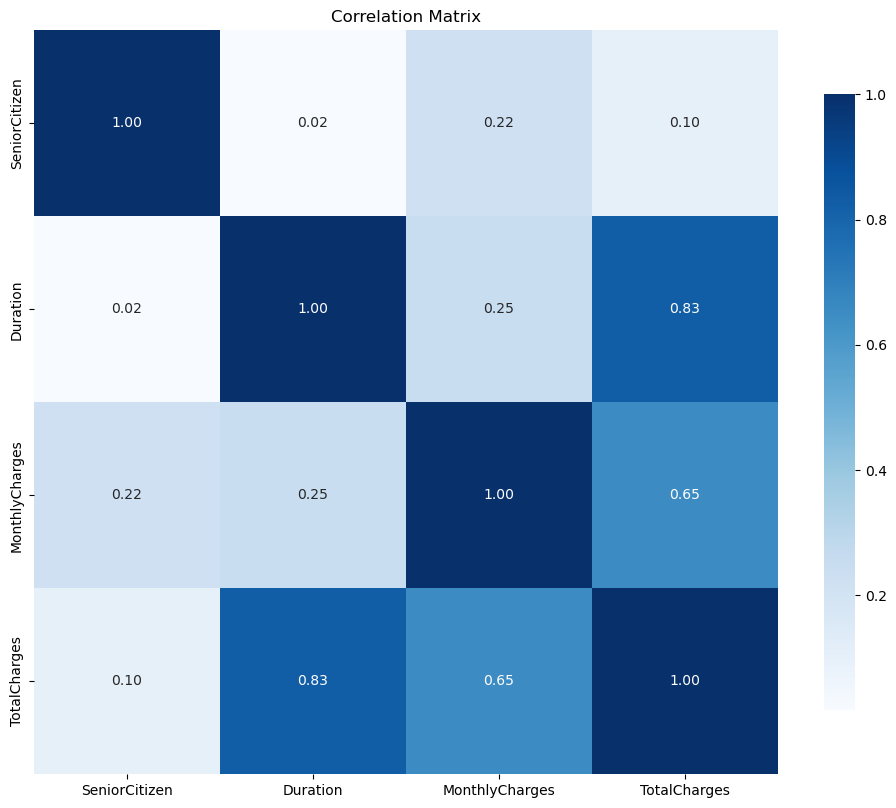

In [112]:
#- Depending on the correlation matrix, which variables have a strong relationship with each other?

correlation_matrix = df[['SeniorCitizen', 'Duration', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(12,10))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')

### Conclusion¶
#### Duration & TotalCharges--------------->>>+0.83 (Strong Correlation)
#### This means: The longer a customer stays with the company, the more money they are charged in total
#### MonthlyCharges & TotalCharges--------->>>+0.65 (Moderate Correlation)
#### This means: If a customer is on a higher monthly billing plan, they tend to have higher total charges
#### SeniorCitizen & MonthlyCharges-------->>>+0.22 (Weak Correlation)
#### This means: Senior citizens tend to pay slightly more per month than non-senior citizens

#### Q7 - From the previous question,What is the relationship between the Internet Services and the churn rate?

In [113]:
df['InternetService'].unique()



array(['DSL', 'Fiber optic', 'No'], dtype=object)

Churn,Not Churned,Churned
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


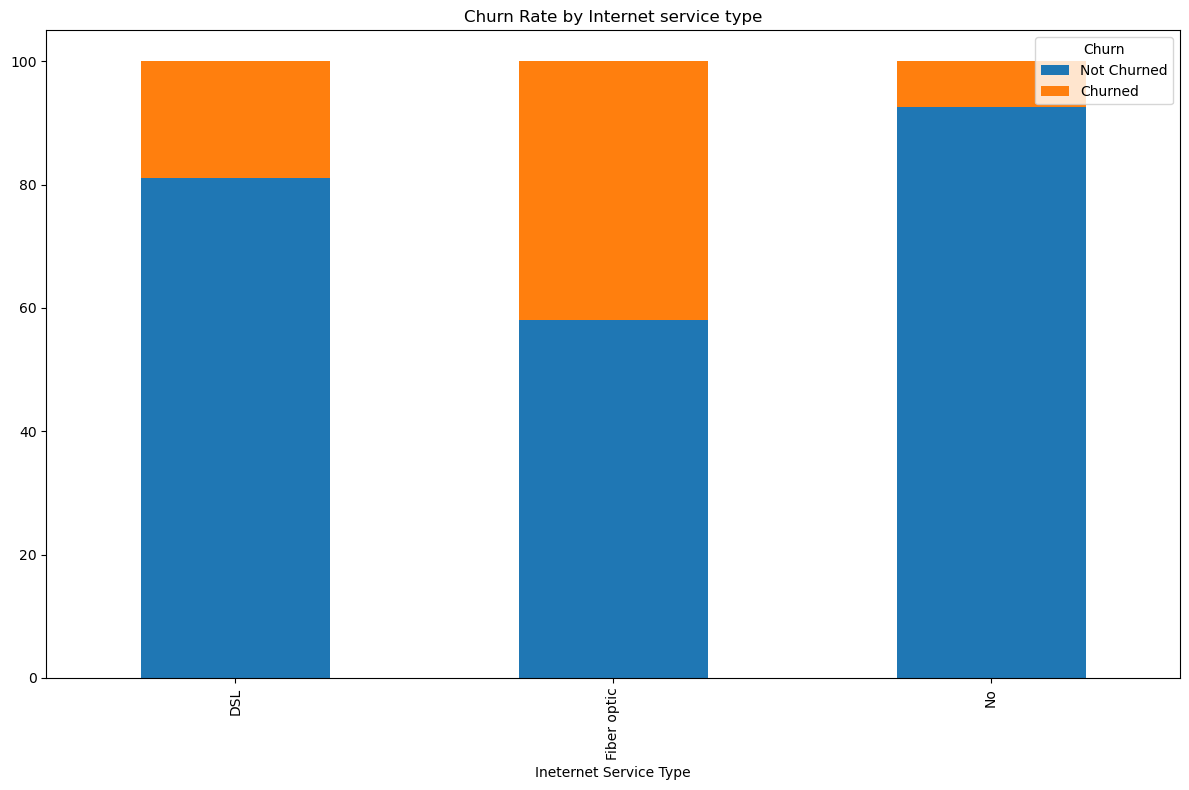

In [114]:
is_churned_counts = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().fillna(0)* 100

is_churned_counts= is_churned_counts.rename(columns= {'Yes': 'Churned', 'No': 'Not Churned'})

is_churned_counts.plot(kind= 'bar', stacked= True, figsize= (12,8))
plt.title('Churn Rate by Internet service type')
plt.xlabel('Ineternet Service Type')
plt.tight_layout()

is_churned_counts

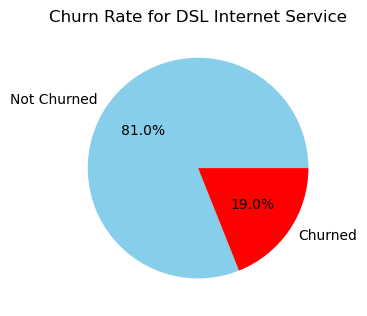

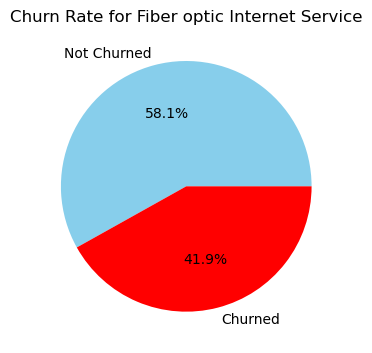

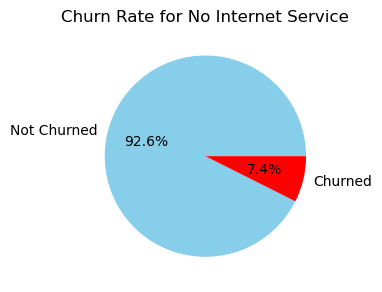

In [115]:
#Visualization of the relationship between the Internet Services and the churn rate using 3 pie charts one for each type of Internet Service
internet_services = df['InternetService'].unique()

# Loop through each internet service and create a pie chart for churn rate
for service in internet_services:
    service_data = df[df['InternetService'] == service] # filter the dataframe for the current internet service
    churn_counts = service_data['Churn'].value_counts() 
    churn_counts.index = churn_counts.index.map({'Yes': 'Churned', 'No': 'Not Churned'})
    
      # Plotting the pie chart for churn rate for the current internet service
    plt.figure(figsize=(10, 8))
    plt.subplot(1, len(internet_services), list(internet_services).index(service) + 1)
    plt.title(f'Churn Rate for {service} Internet Service')
    plt.pie(churn_counts, labels=list(churn_counts.index), autopct='%1.1f%%', colors=['skyblue', 'red'])
    plt.tight_layout()



#### Conclusion¶
##### > Fiber optic users have the highest churn rate (~42%)--->> Possibly due to higher costs or service expectations.
##### > DSL users have a lower churn rate (~19.5%)
##### > Customers with no internet service almost never churn (~7.5%).

#### Q8 - How many Internet Services do we provide? (List names and ratio)

InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

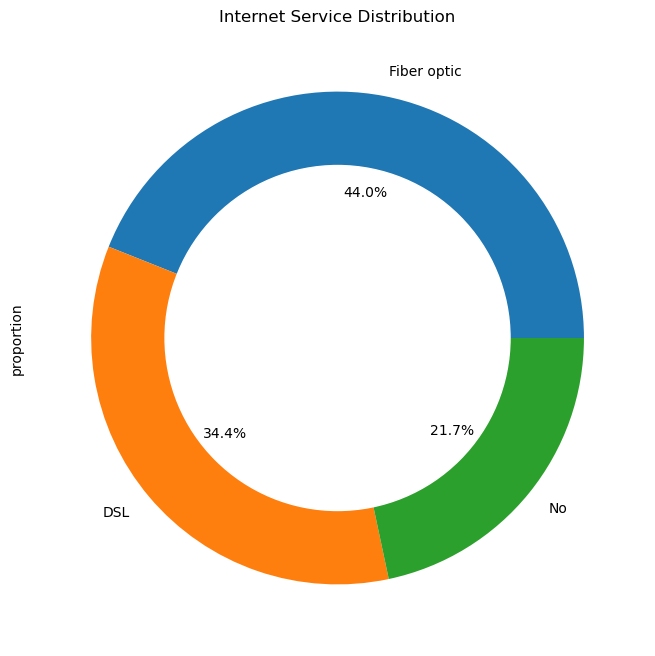

In [116]:
IS_count= df['InternetService'].value_counts(normalize=True)*100

# Plotting the distribution of Internet Services
plt.figure(figsize=(10,8))
IS_count.plot(kind= 'pie', color=['lightgreen', 'orange', 'red'], autopct= '%1.1f%%')

# add a circle at the center to transform it in a donut chart
my_circle=Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Internet Service Distribution')

IS_count



#### Conclusion:
##### > The company provides two types of internet services: DSL and Fiber optic.
##### > Around 44% of customers use Fiber optic, and 34% use DSL.
##### > Around 22% do not use internet service at all.

#### Q9 - What is our Contract types we provide? - names and ratio

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

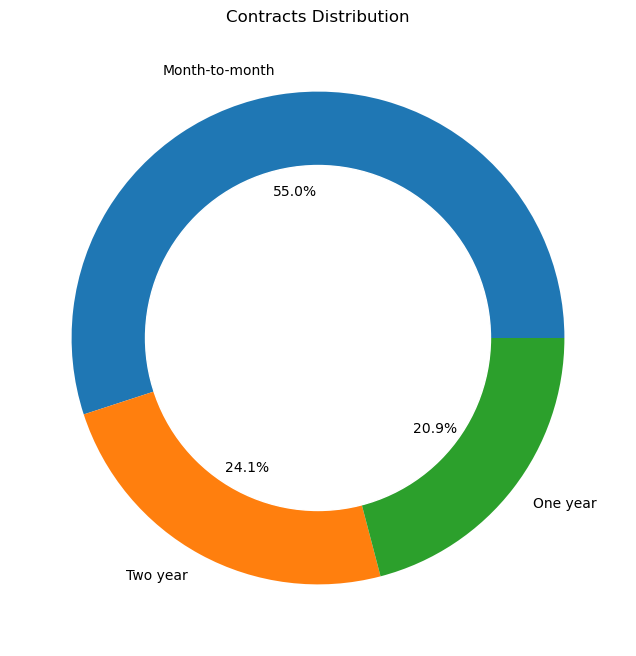

In [117]:
contract_dic= df['Contract'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(contract_dic, labels=list(contract_dic.index), autopct= '%1.1f%%')

# add a circle at the center to transform it in a donut chart
my_circle=Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Contracts Distribution')

contract_dic

#### Conclusion:¶
##### > The majority of customers (55%) are on Month-to-month contracts — these are more flexible and correlate strongly with higher churn rates.
##### > Long-term customers are nearly evenly split between 1-year and 2-year contracts, for more stability.

#### Q10 - How many customers uses StreamingTV ?

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

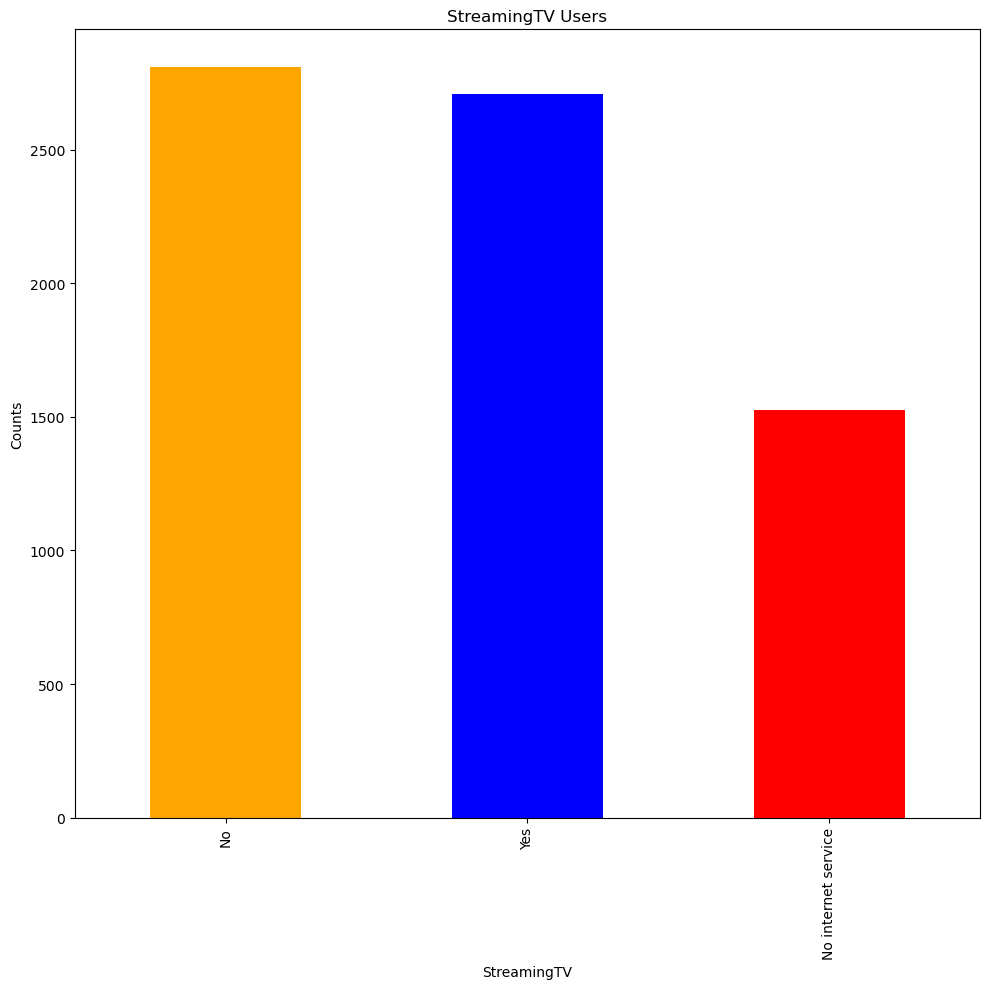

In [118]:
streaming_tv_counts= df['StreamingTV'].value_counts()

plt.figure(figsize=(10, 10))
streaming_tv_counts.plot(kind= 'bar', color= ['orange','blue','red'])
plt.title('StreamingTV Users')
plt.ylabel('Counts')
plt.tight_layout()

streaming_tv_counts
                         

#### Q11 - what is the ratio between users who streaming movies to StreamingTV subscribers?

In [119]:
streaming_movie_counts= df['StreamingMovies'].value_counts()
streaming_movie_counts

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [120]:
streaming_tv_counts= df['StreamingTV'].value_counts()
streaming_tv_counts

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [121]:
# -  How many customers are using streaming movies and streamingTV at the same time?

streaming_movie_and_tv_counts= df[(df['StreamingMovies'] == 'Yes') & (df['StreamingTV']== 'Yes')].shape[0]

streaming_movie_and_tv_counts

1940

In [122]:
#Visualization of the relationship between StreamingTV and StreamingMovies using venn diagram

!pip install matplotlib-venn


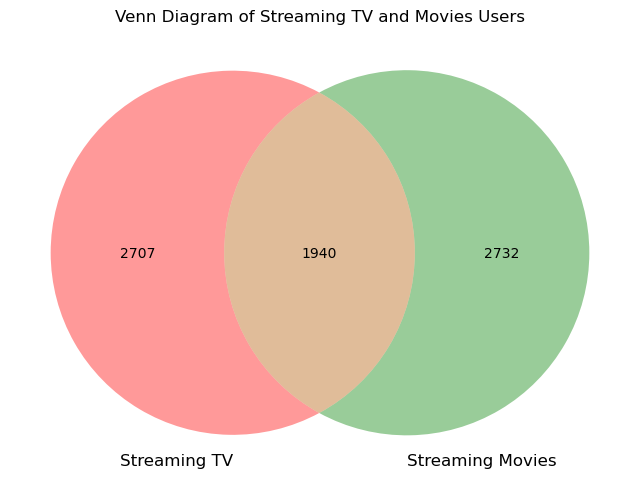

In [123]:
#Visualization of the relationship between StreamingTV and StreamingMovies using venn diagram
from matplotlib_venn import venn2
plt.figure(figsize=(8, 8))
plt.title('Venn Diagram of Streaming TV and Movies Users')
venn2(subsets=(streaming_tv_counts['Yes'], streaming_movie_counts['Yes'], streaming_movie_and_tv_counts),
      set_labels=('Streaming TV', 'Streaming Movies'),)

#### Conclusion:¶
##### > Around '38.43%' or '2707'of users using StreamingTV.
##### > Around '38.80%' or '2732' of users using Streaming Movies.
##### > Around '35.66%' or '1940' of users using both of Streaming TV & Movies.

#### Q12 - Is there a strong relationship between the monthly recharge rate and the dependents?

Dependents
Without Dependents    67.002808
With Dependents       59.522156
Name: MonthlyCharges, dtype: float64

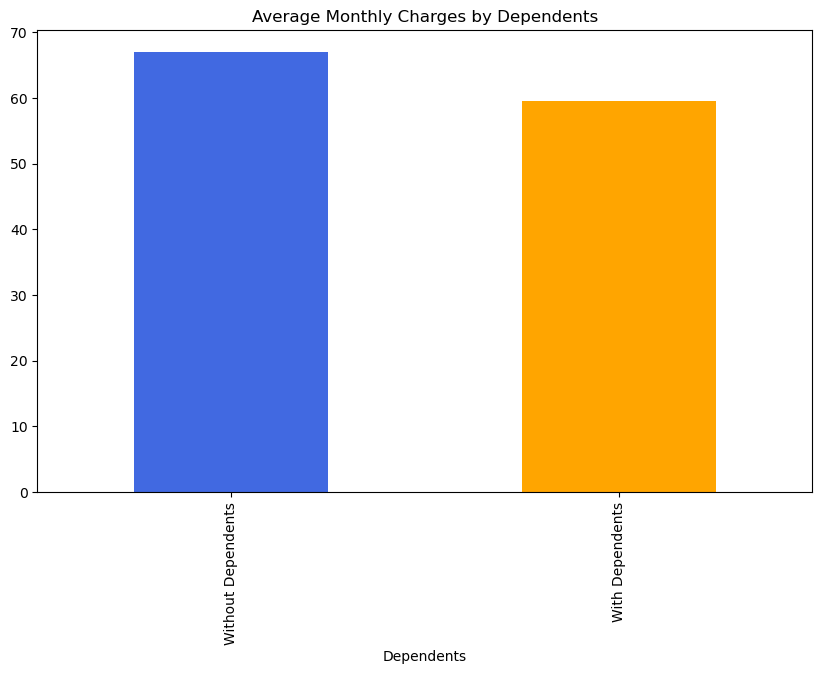

In [124]:
R_monthly_dependents= df.groupby('Dependents')['MonthlyCharges'].mean()
R_monthly_dependents= R_monthly_dependents.rename(index= {'Yes': 'With Dependents', 'No': 'Without Dependents'})

plt.figure(figsize=(10, 6))
R_monthly_dependents.plot(kind= 'bar', color=['royalblue', 'orange'])    
plt.title('Average Monthly Charges by Dependents')

R_monthly_dependents      


#### Conclusion:¶
##### > Customers without dependents pay slightly more per month on average than the customers with dependents.
##### > The difference is 7.5$ per month.
##### > There is no strong relationship between having dependents and the monthly charge.

#### Q13 - who is the the most important customer in the company according to Monthly and Total charges?¶

In [125]:
df['MonthlyCharges'].isna().sum()

0

In [126]:
top_monthly= df.groupby('customerID')['MonthlyCharges'].sum().sort_values(ascending=False).head(10)

top_monthly

customerID
7569-NMZYQ    118.75
8984-HPEMB    118.65
5734-EJKXG    118.60
5989-AXPUC    118.60
8199-ZLLSA    118.35
9924-JPRMC    118.20
2889-FPWRM    117.80
3810-DVDQQ    117.60
9739-JLPQJ    117.50
2302-ANTDP    117.45
Name: MonthlyCharges, dtype: float64

In [127]:
top_total= df.groupby('customerID')['TotalCharges'].sum().sort_values(ascending=False).head(10)

top_total

customerID
2889-FPWRM    8684.80
7569-NMZYQ    8672.45
9739-JLPQJ    8670.10
9788-HNGUT    8594.40
8879-XUAHX    8564.75
9924-JPRMC    8547.15
0675-NCDYU    8543.25
6650-BWFRT    8529.50
0164-APGRB    8496.70
1488-PBLJN    8477.70
Name: TotalCharges, dtype: float64

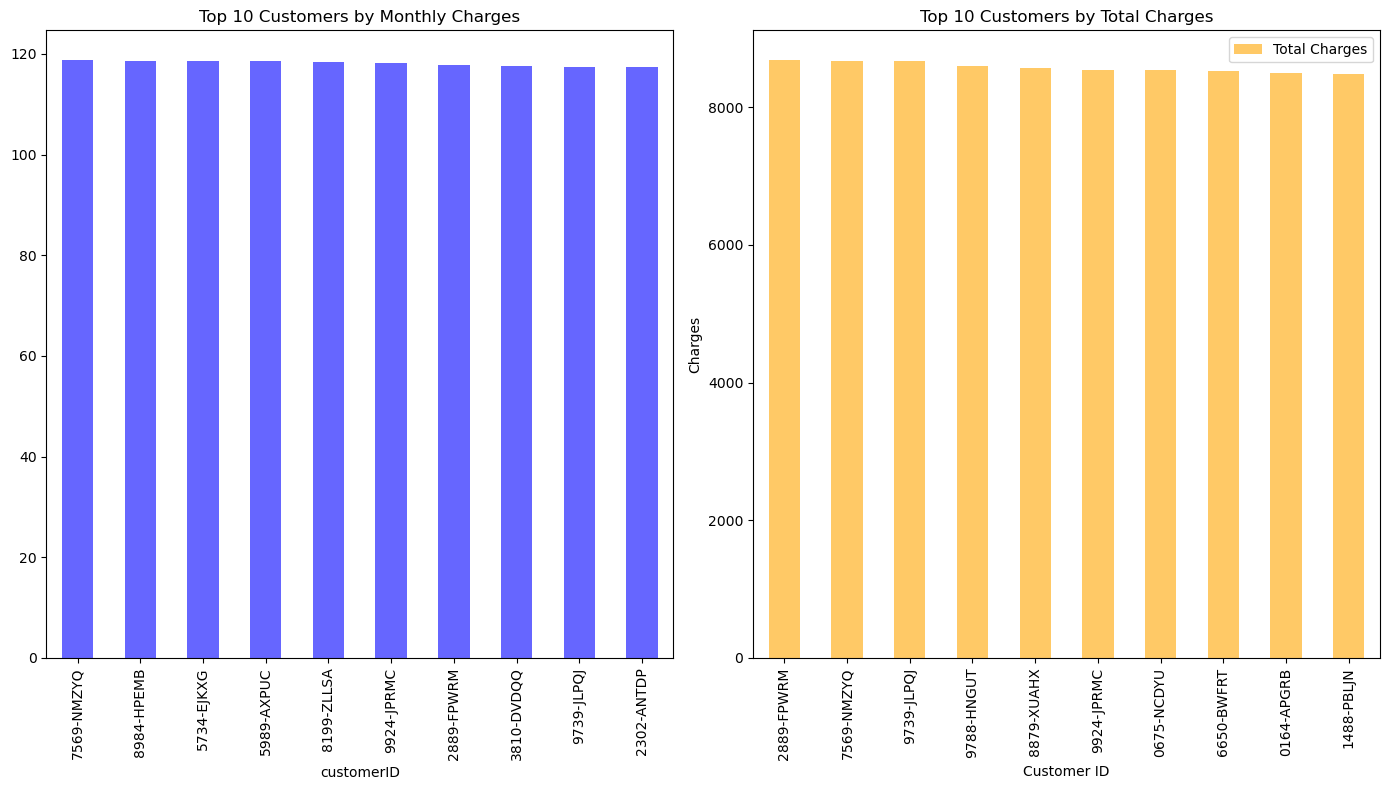

In [128]:
#visualization of the most important customers in the company according to Monthly and Total charges

plt.figure(figsize=(14, 8))

plt.subplot(1,2,1)
top_monthly.plot(kind='bar', color='blue', alpha= 0.6,  label='Monthly Charges')
plt.title('Top 10 Customers by Monthly Charges')

plt.subplot(1, 2, 2)
top_total.plot(kind='bar', color='orange', alpha=0.6, label='Total Charges')
plt.title('Top 10 Customers by Total Charges')
plt.xlabel('Customer ID')
plt.ylabel('Charges')
plt.legend()
plt.tight_layout()

#### Conclusion:
##### > The customer with ID:7569-NMZYQ is the most important customer in the company according to the monthly charge.
##### > The customer with ID:2889-FPWRM is the most important customer in the company according to the total charge

#### Q14 - How many payment methods we provide? and what is the ratio between each others?

In [129]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Duration,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
print(df['PaymentMethod'].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [131]:
pay_methods= df['PaymentMethod'].value_counts()
pay_methods

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Text(0.5, 1.0, 'Payment Method Distribution')

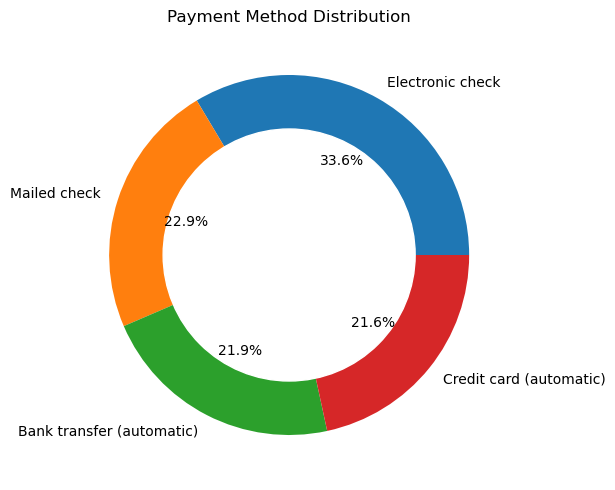

In [132]:
pay_methods.plot(kind='pie', color=['lightblue', 'orange', 'red', 'green'], autopct='%1.1f%%')

my_circle= Circle((0,0),  0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

plt.title('Payment Method Distribution')



#### Conclusion:
##### > The company has 4 payment methods: 'Electronic check' , 'Mailed check' , 'Bank transfer' , 'Credit card'.
##### > Electronic check is the most common method (33.6%).
##### > The rest are almost evenly distributed around 21–23%.¶

#### Q15 - what is our churn rate?

Churn
No churned    5174
Churned       1869
Name: count, dtype: int64

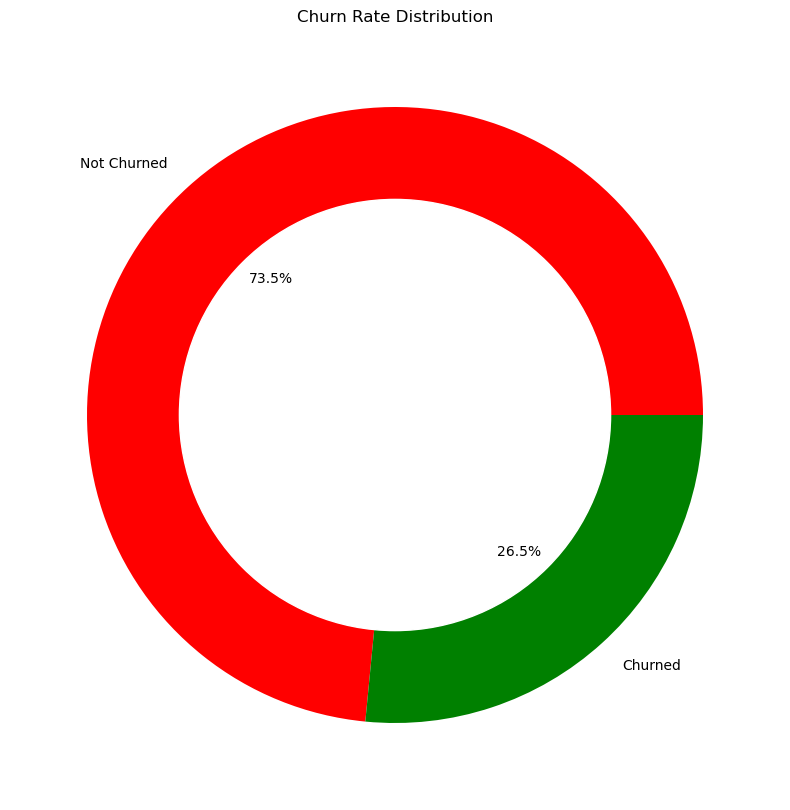

In [133]:
churn_count= df['Churn'].value_counts()
churn_count.index= churn_count.index.map({'Yes': 'Churned', 'No': 'No churned'})

#Plotting the distribution of churn rate

plt.figure(figsize=(10, 8))
churn_count.plot(kind='pie', labels=list(churn_counts.index), autopct='%1.1f%%', colors=['red', 'green'])

# add a circle at the center to transform it in a donut chart

my_circle= Circle((0,0), 0.7, color= 'White')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.tight_layout()
plt.title('Churn Rate Distribution')

plt.xlabel('')
plt.ylabel('')
churn_count

#### Conclusion:¶
##### >The churn rate is approximately 26.5%, meaning 1 out of 4 customers leaves the company.
##### > The staying rate is about 73.5%.
#### >>> The company should lower the churn rate between 10% to 15%.¶
..

#### Q16 - What is the average monthly charge?

In [134]:
avg_monthly_charge= df['MonthlyCharges'].mean()
print(f"The avarage monthly charge is : {avg_monthly_charge: .2f} $")

The avarage monthly charge is :  64.76 $


In [135]:
# Calculate the correlation between Senior Citizens and Monthly Charges
correlation_matrix = df[['SeniorCitizen', 'MonthlyCharges']].corr()
print(f"The correlation between Senior Citizens and Monthly Charges is: {correlation_matrix.iloc[0, 1]:.2f}")

The correlation between Senior Citizens and Monthly Charges is: 0.22


Text(0.5, 1.0, 'Correlation Matrix')

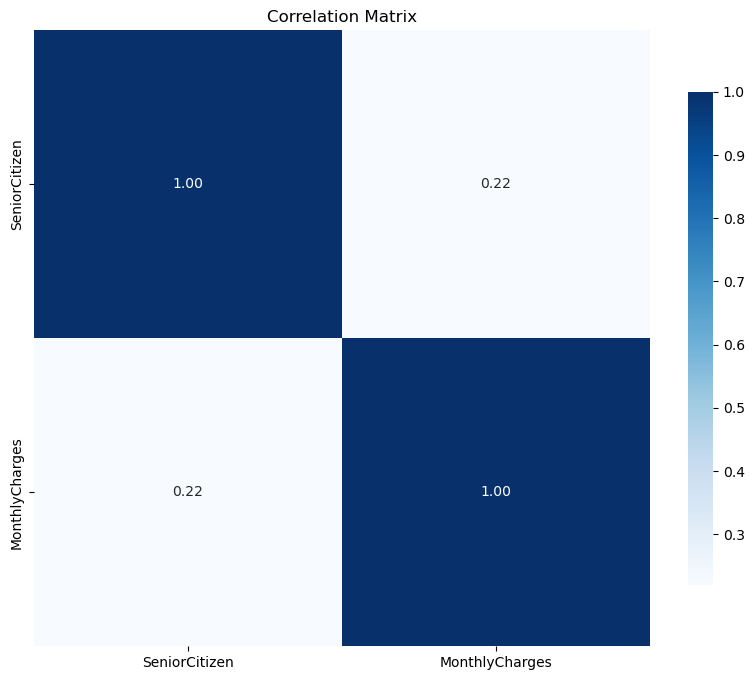

In [136]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')

#### What to decide?¶
##### We Want to Give Offers According to Monthly Charge Categories — Can You Explain That Using Visualization?

In [137]:
monthly_charge_bins= [0,35, 70, 100, np.inf]  #The maximum Monthly Charges is 118.75
monthly_charge_labels=['Low', 'Medium', 'High', 'Extreme']
df['MonthlyChargeCategory']= pd.cut(df['MonthlyCharges'], bins= monthly_charge_bins,  labels=monthly_charge_labels)
monthly_categories=df['MonthlyChargeCategory'].value_counts()
monthly_categories

MonthlyChargeCategory
High       2681
Low        1735
Medium     1725
Extreme     902
Name: count, dtype: int64

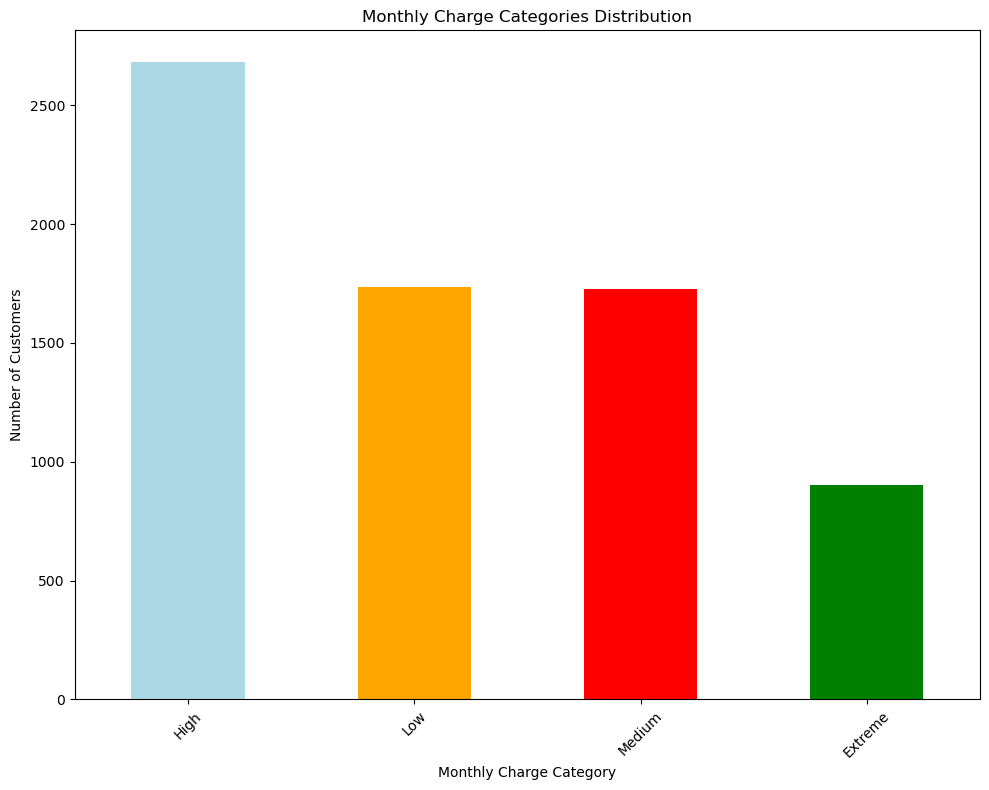

In [138]:
# Plotting the distribution of Monthly Charge Categories
plt.figure(figsize=(10, 8))
monthly_categories.plot(kind='bar', color=['lightblue', 'orange', 'red', 'green'])
plt.title('Monthly Charge Categories Distribution')
plt.xlabel('Monthly Charge Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

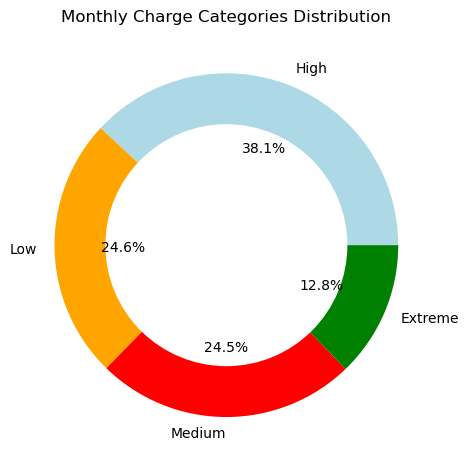

In [139]:
monthly_categories.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange', 'red', 'green'])
# add a circle at the center to transform it in a donut chart
my_circle = Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Monthly Charge Categories Distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### Conclusion:¶
##### > After dividing the customers into segments based on monthly charge to 4 segments: 'Low' , 'Medium' , 'High' , 'Extreme'.
##### > Found that around majority 38.1% of the customers are in the high segment.
##### > And around 24.6% of customers belongs to the low segment.

#### The churn rate for each segment.

In [140]:
segment_churn_rate = df.groupby('MonthlyChargeCategory')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
segment_churn_rate = segment_churn_rate.rename(columns={'Yes': 'Churn', 'No': 'Not Churned'})
segment_churn_rate

C:\Users\Bhushan Patil\AppData\Local\Temp\ipykernel_28260\2887690105.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_churn_rate = df.groupby('MonthlyChargeCategory')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100


Churn,Not Churned,Churn
MonthlyChargeCategory,,
Low,89.106628,10.893372
Medium,76.057971,23.942029
High,62.178292,37.821708
Extreme,71.951220,28.048780


<Figure size 1200x800 with 0 Axes>

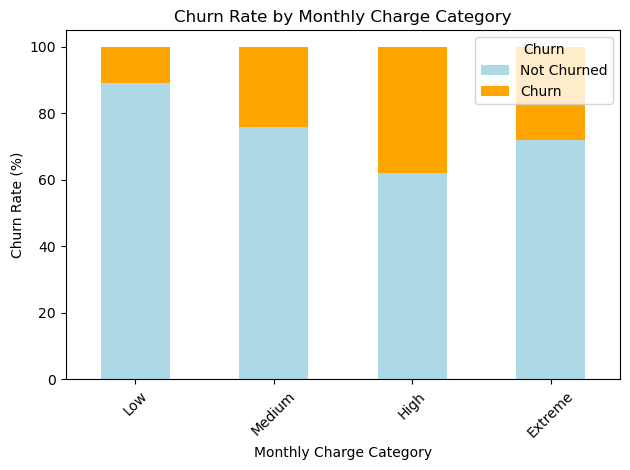

In [141]:
#visualization of the churn rate for each segment
plt.figure(figsize=(12, 8))
segment_churn_rate.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])
plt.title('Churn Rate by Monthly Charge Category')
plt.xlabel('Monthly Charge Category')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()

In [142]:
# Define the list of relevant service columns
service_columns = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Replace 'No internet service' and 'No phone service' with 'No' to make the mapping easier 
DATA= df.copy()
DATA[service_columns] =DATA[service_columns].replace(['No internet service', 'No phone service'], 'No')

# Create a ChargeCategory based on MonthlyCharges
def categorize_charge(charge):
    if charge < 35:
        return 'Low'
    elif charge < 70:
        return 'Mid'
    elif charge < 100:
        return 'High'
    else:
        return 'Extreme'

DATA['ChargeCategory'] = DATA['MonthlyCharges'].apply(categorize_charge)


# Convert 'Yes'/'No' to binary 1/0
service_binary = DATA[service_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Add ChargeCategory for grouping
service_binary['ChargeCategory'] = DATA['ChargeCategory']

# Calculate total and average number of services per ChargeCategory
services_per_category = pd.DataFrame(service_binary.groupby('ChargeCategory').sum())
avg_services_per_customer = pd.DataFrame(service_binary.groupby('ChargeCategory').mean().sum(axis=1))



C:\Users\Bhushan Patil\AppData\Local\Temp\ipykernel_28260\1836966172.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  service_binary = DATA[service_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


#### The number of services each segment subscribed to.

In [143]:
services_per_category

,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
ChargeCategory,,,,,,,,
Extreme,908,783,433,648,718,508,883,883
High,2683,1541,833,1100,1099,844,1363,1368
Low,1526,342,38,45,22,39,5,6
Mid,1244,305,715,636,583,653,456,475


#### The average services that each customer in each segment subscribed to.

In [144]:

avg_services_per_customer.sort_values(by=0, ascending=False).round(2)

,0
ChargeCategory,
Extreme,6.35
High,4.04
Mid,2.94
Low,1.17


#### The Extreme segment has the highest AVG: 6.35 of 8 for services subscription, unlike the Low segment with AVG: 1.17 of 8

#### After analyzing the churn rate for each segment,and the AVG services for the customers in each segment.¶
##### Here is what we decided to offer for each segment:
##### Low segment:-
##### >> Upgrade bundle at small discount or offering addition services for small offer
-----------------------------------------------------------------------------------------------
##### Medium segment:-
##### >> Offering a package of services for a small discount, or an upgrade for limited short time of other services
-----------------------------------------------------------------------------------------------
##### High segment:-
##### >> Offering the whole package of services for limited time for a small offer to satisfy their needs.

-----------------------------------------------------------------------------------------------¶
#### Extreme segment:-
#### >> Offering the whole package of services for a yearly subscription with a small offer of not, or big offer for the two year subscription with high discount.
